# Data Analysis Using Python Task - 4
## Step 1: Load and Explore

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Load dataset

In [2]:
df=pd.read_csv("D:/house_prices.csv")

### Basic Information

In [3]:
print("Shape:", df.shape)
print("\n Missing Values:", df.isnull().sum())
print("\n Data Types:", df.dtypes)
print("\n Summary Stats:", df.describe())

Shape: (302, 4)

 Missing Values: Size               5
Location           0
Number of Rooms    5
Price              5
dtype: int64

 Data Types: Size               float64
Location            object
Number of Rooms    float64
Price              float64
dtype: object

 Summary Stats:               Size  Number of Rooms          Price
count   297.000000       297.000000     297.000000
mean   2340.323232         3.973064  396266.602054
std    1000.922114         2.029998  156938.654736
min     501.000000         1.000000   58665.380000
25%    1521.000000         2.000000  255219.110000
50%    2268.000000         4.000000  397129.280000
75%    3234.000000         6.000000  521434.000000
max    3999.000000         7.000000  684818.140000


### Remove duplicates

In [26]:
df.drop_duplicates()

,Size,Location,Number of Rooms,Price
0,3674.0,rural,4.0,592455.37
1,1360.0,urban,1.0,236963.63
2,1794.0,urban,1.0,322548.72
3,1630.0,rural,7.0,315128.00
4,1595.0,suburban,2.0,274232.11
...,...,...,...,...
295,2034.0,suburban,2.0,335045.84
296,646.0,urban,1.0,142156.95
297,3719.0,suburban,5.0,620609.33
298,3411.0,suburban,5.0,552801.35


### Handle missing values

In [27]:
df["Size"].fillna(df["Size"].median())
df["Number of Rooms"].fillna(df["Number of Rooms"].median())
df["Price"].fillna(df["Price"].median())

0      592455.37
1      236963.63
2      322548.72
3      315128.00
4      274232.11
         ...    
295    335045.84
296    142156.95
297    620609.33
298    552801.35
299    404274.20
Name: Price, Length: 300, dtype: float64

### Visualize distributions

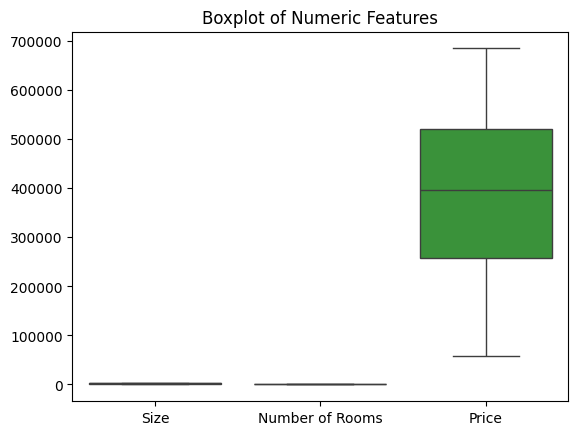

In [28]:
sns.boxplot(data=df[["Size", "Number of Rooms", "Price"]])
plt.title("Boxplot of Numeric Features")
plt.show()

## Step 2: Data Preprocessing

In [29]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

### Define features and target

In [30]:
X = df.drop("Price", axis=1)
y = df["Price"]

### Column types

In [31]:
numeric_features = ["Size", "Number of Rooms"]
categorical_features = ["Location"]

### Create preprocessing pipeline

In [32]:
preprocessor = ColumnTransformer([("num", StandardScaler(), numeric_features),("cat", OneHotEncoder(drop="first"), categorical_features)])

### Split the dataset

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Step 3 & 4: Model Training

In [34]:
from sklearn.linear_model import LinearRegression

### Create pipeline

In [35]:
model = Pipeline([("preprocessing", preprocessor),("regressor", LinearRegression())])

### Train the model

In [36]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Size', 'Number of Rooms']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Location'])])),
                ('regressor', LinearRegression())])

## Step 5: Model Evaluation

In [37]:
from sklearn.metrics import mean_squared_error, r2_score

### Predict

In [38]:
y_pred = model.predict(X_test)

### Evaluation metrics

In [39]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

RMSE: 40511.90
R² Score: 0.9204


### Compare predicted vs actual

In [40]:
results = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred
}).reset_index(drop=True)
print("\nSample Predictions:\n", results.head())


Sample Predictions:
       Actual      Predicted
0  415356.26  396576.792345
1  281634.15  290876.512898
2  222029.59  234248.902229
3  397129.28  291189.884640
4  590824.60  605693.924040
